In [ ]:
from osgeo import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageColor
from scipy import stats

In [ ]:
csv = pd.read_csv('/content/drive/MyDrive/saocom.tif/Book5.csv')
df = pd.DataFrame(csv)
null = df.isnull()



In [ ]:
dfreal = df.values.tolist()
l = len(dfreal)
l

913402

In [ ]:
x = []
y = []
for i in range(l):
  value = dfreal[i]
  min =np.min(value)
  pos = value.index(min)
  x.append(min)
  y.append(pos)

In [ ]:
len(y)

913402

In [ ]:
array = np.array(y,dtype = np.int16)
reshape = np.reshape(array,[742,1231],order = 'F')
xs,ys=reshape.shape
print(reshape.dtype)
main = gdal.Open('/content/drive/MyDrive/saocom.tif/20210227vh.tif')
g = main.GetGeoTransform()
p = main.GetProjection()


int16


In [ ]:
#image = plt.imshow(reshape)
gdal1 = gdal.GetDriverByName('GTiff')
gdal1.Register()
create = gdal1.Create('classes.tiff',xsize =reshape.shape[1] ,ysize=reshape.shape[0] ,bands =1)
create1 = create.GetRasterBand(1)
create1.WriteArray(reshape)


In [ ]:
m,n =reshape.shape

In [ ]:
df1 = pd.DataFrame(reshape)
df1[1].unique()

array([ 3,  1,  2,  4,  5,  9,  0, 11,  7], dtype=int16)

In [ ]:
b=[946, 321, 733, 628, 1117, 782, 1221, 369, 128, 90]
a=[405, 17, 142, 577, 346, 493, 328, 415, 361, 674]

In [ ]:
pixel1 =[]
for i in range(len(a)):
  pixel = reshape[a[i],b[i]]
  pixel1.append(pixel)
  


In [ ]:
pixel1

[2, 2, 4, 2, 3, 2, 0, 3, 0, 3]

In [ ]:
z = np.array(pixel1)
z2 = stats.mode(z)
z2

In [ ]:
s =np.zeros([742,1231])
for i in range(m):
  for j in range(n):
    pixel1 = reshape[i,j]
    if pixel1 == 0:
      s[i,j] =250
    #elif pixel1 == 4:
      #s[i,j] = 250
    #elif pixel1 == 6:
      #s[i,j] = 250
    #elif pixel1 == 7:
      #s[i,j] = 250
    else:
      s[i,j]=0





In [ ]:

m,n = s.shape

In [ ]:
t =[]
for i in range(m):
  for j in range(n):
    pix = s[i,j]
    if pix == 250:
      t.append(pix)


In [ ]:
len(t)

97900

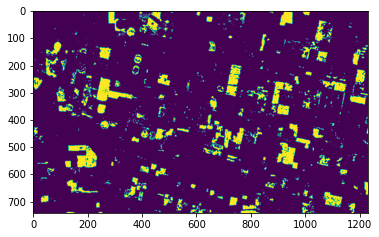

In [ ]:
plt.imshow(s)

In [ ]:
driver = gdal.GetDriverByName('GTIFF')
driver.Register()
driver1 = driver.Create('SAOCOM2.tif',xsize = s.shape[1],ysize = s.shape[0],bands= 1)
driver1. SetGeoTransform(g)
driver1.SetProjection(p)
driver2 = driver1.GetRasterBand(1)
driver2.WriteArray(s)
driver2.SetNoDataValue(np.nan)
driver2.FlushCache()
driver2 = None
driver1 =None


In [ ]:
reshape.shape[1]
np.max(reshape)

19

In [ ]:
im = gdal.GetDriverByName("GTiff")
im.Register()
final = im.Create("binmask.tif",xsize = reshape.shape[1],ysize = reshape.shape[0],bands =1)
final.SetGeoTransform(g)
final.SetProjection(p)
outband = final.GetRasterBand(1)
outband.WriteArray(reshape)
outband.SetNoDataValue(np.nan)
outband.FlushCache()
outband = None
final =None

In [ ]:
bin = gdal.Open('/content/binmask.tif')
con = bin.ReadAsArray().astype(np.int8)
row, column = con.shape
con

array([[3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4]], dtype=int8)

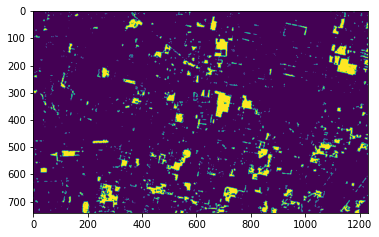

In [ ]:
replace = (np.where((con==5),255,0))
replace
t =plt.imshow(replace)



In [ ]:
xx =np.zeros([742,1231])
for i in range(742):
  for j in range(1231):
    waste = con[i,j]
    worst = xx[i,j]
    if (waste ==0):
      xx[i,j]= 25
      
    elif (waste == 1):
      xx[i,j]= 25
      
    elif (waste == 2):
      xx[i,j] = 50
      
    elif (waste == 3):
      xx[i,j]= 75
      
    elif (waste == 4):
      xx[i,j]= 100
      
    elif (waste == 5):
      xx[i,j]= 150
      
    elif (waste == 6):
      xx[i,j] = 175
      #xx.append(worst)
    elif (waste == 7):
      xx[i,j]= 175
      #xx.append(worst)
    elif (waste ==8):
      xx[i,j]= 225
    elif (waste == 9):
      xx[i,j] = 225
    else:
      xx[i,j] = 255
      #xx.append(worst)
#sur = np.array(xx)


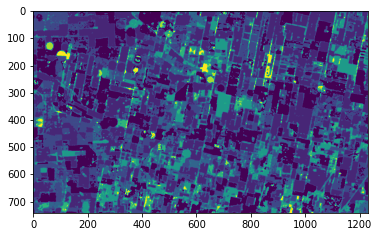

In [ ]:
xx
plt.imshow(xx)

In [ ]:
yy =np.zeros([742,1231])
for i in range(742):
  for j in range(1231):
    waste = con[i,j]
    if (waste ==6):
      yy[i,j]= 255
      
    elif (waste == 7):
      yy[i,j]= 255
    else :
      yy[i,j] =0
      


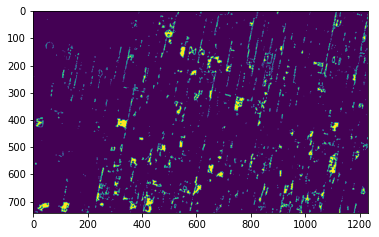

In [ ]:
yy
plt.imshow(yy)

In [ ]:
surre = np.reshape(sur,[742,1231],order ='F')
surre

array([[ 75, 100,  25, ...,  50,  50,  50],
       [ 75, 100,  25, ...,  50, 100,  50],
       [ 75, 100,  25, ...,  75, 175,  50],
       ...,
       [ 75,  25,  25, ...,  50, 100, 100],
       [ 75,  25,  25, ...,  50, 100, 100],
       [ 75,  25,  25, ...,  50,  50, 100]])

In [ ]:
from google.colab import files
files.download('t.tif')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/tif.tif'
with open(path,'w')as f:
  f.write('replace')

In [ ]:
ref1 = []
for i in range(row):
  for j in range(column):
    every = con[i,j]
    if every== 0:
      pixel =1
      ref1.append(pixel)
    elif every==1:
      pixel = 1
      ref1.append(pixel)
    else :
      pixel = 255  
      ref1.append(pixel)

In [ ]:
len(ref1)

In [ ]:
im1 = np.array(ref1)
convert1 = np.reshape(im1,[742,1231],order='F')
#mask = convert1[convert1]==1
convert1



In [ ]:
im2 = gdal.GetDriverByName("GTiff")
im2.Register()
final1 = im2.Create("All_classes.tif",xsize = replace.shape[1],ysize = replace.shape[0],bands =1)
final1.SetGeoTransform(g)
final1.SetProjection(p)
outband1 = final1.GetRasterBand(1)
outband1.WriteArray(xx)

0

In [ ]:
ma = gdal.Open('/content/All_classes.tif')
maarray = ma.ReadAsArray()
size = maarray.shape
maarray

array([[ 75,  75,  75, ...,  50,  50,  50],
       [ 75,  75,  75, ...,  50,  50,  50],
       [ 75,  75,  75, ...,  50,  50,  50],
       ...,
       [ 50,  50,  50, ..., 100, 100, 100],
       [ 50,  50,  50, ..., 100, 100, 100],
       [ 50,  50,  50, ..., 100, 100, 100]], dtype=uint8)

In [ ]:
d = pd.DataFrame(y)

In [ ]:
img = Image.new('RGBA',(742,1231))
for p in range(xs):
  for q in range(ys):
    pixel = reshape[p,q]
    if (pixel == 0):
      img.putpixel((p,q),ImageColor.getcolor('red','RGBA'))
    elif (pixel == 1):
      img.putpixel((p,q),ImageColor.getcolor('red','RGBA'))  
    elif (pixel == 2):
      img.putpixel((p,q),ImageColor.getcolor('green','RGBA')) 
    elif (pixel == 3):
      img.putpixel((p,q),ImageColor.getcolor('cyan','RGBA'))    
    elif (pixel == 4):
      img.putpixel((p,q),ImageColor.getcolor('blue','RGBA')) 
    elif (pixel == 5):
      img.putpixel((p,q),ImageColor.getcolor('yellow','RGBA'))
    elif (pixel == 6):
      img.putpixel((p,q),ImageColor.getcolor('violet','RGBA'))        
    elif (pixel == 7):
      img.putpixel((p,q),ImageColor.getcolor('violet','RGBA')) 
    elif (pixel == 8):
      img.putpixel((p,q),ImageColor.getcolor('orange','RGBA'))
    elif (pixel == 9):
      img.putpixel((p,q),ImageColor.getcolor('chartreuse','RGBA'))  
    elif (pixel == 10):
      img.putpixel((p,q),ImageColor.getcolor('teal','RGBA'))  
    elif (pixel == 11):
      img.putpixel((p,q),ImageColor.getcolor('black','RGBA'))  
    elif (pixel == 12):
      img.putpixel((p,q),ImageColor.getcolor('black','RGBA'))  
    elif (pixel == 13):
      img.putpixel((p,q),ImageColor.getcolor('pink','RGBA'))
    elif (pixel == 14):
      img.putpixel((p,q),ImageColor.getcolor('maroon','RGBA'))



In [ ]:
plt.figure(figsize =(20,10))
plt.imshow(img)

In [ ]:
new = Image.new('1',(742,1231))
for i in range(xs):
  for j in range (ys):
    pix = reshape[i,j]
    new.putpixel((i,j)) 

In [ ]:

list =[]
for i in range (xs):
  for j in range(ys):
    pix = reshape[i,j]
    list.append(pix)
array = np.array(list,dtype = np.int8)
array1 = np.reshape(array,[742,1231],order = 'F')
array1.shape
resultImage = Image.fromarray(array1)
plt.imshow(resultImage)
resultImage.size

r,g,b = resultImage.split()


In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(resultImage)
resultImage.size

In [ ]:
resultImage.getpixel((0,0))

In [ ]:
n = 12
colors = np.random.rand(n)

In [ ]:
img = Image.open('/content/drive/MyDrive/saocom.tif/download (10).png')
img.transpose(Image.FLIP_LEFT_RIGHT).save('img.png')



In [ ]:
sao = gdal.Open('/content/drive/MyDrive/saocom.tif/hv202101roi.tif')
g = sao.GetGeoTransform()
g
p = sao.GetProjection()
p
 

In [ ]:
im = gdal.Open('/content/drive/MyDrive/saocom.tif/download 13.png')
pro = im.SetProjection(p)
tra = im.SetGeoTransform(g)
arrrr = im.ReadAsArray()
arrrr.shape


In [ ]:
tif = gdal.GetDriverByName('Gtiff')
tif.Register()
outds = tif.Create('mask.tif',xsize = )
tif


In [ ]:
image = Image.open('/content/img.png')
image.transpose(Image.FLIP_TOP_BOTTOM).save('image1.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')